In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
from sklearn.preprocessing import MinMaxScaler

In [8]:
raw_df = pd.read_csv("Stock_CSV/CTSH.csv")

In [9]:
raw_seq = raw_df["4. close"].tolist()

In [10]:
seq = [ele for ele in reversed(raw_seq)] 
seq = np.array(seq)


In [11]:
input_size = 1
num_steps = 30

In [12]:
seq = [np.array(seq[i * input_size: (i + 1) * input_size])
               for i in range(len(seq) // input_size)]

In [13]:
min_max_scaler = MinMaxScaler()
seq = MinMaxScaler().fit_transform(seq)

In [14]:
X = np.array([seq[i: i + num_steps] for i in range(len(seq) - num_steps)])
y = np.array([seq[i + num_steps] for i in range(len(seq) - num_steps)])


In [15]:
train_size = int(len(X)* (1-.1)) #saving 10% for test data
X_train,X_test = X[:train_size] , X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [16]:
X_train.shape
X_train = X_train.reshape((X_train.shape[0], -1), order='F')
X_train.shape

(4501, 30)

array([[0.69839675],
       [0.69399142],
       [0.69312439],
       [0.68960042],
       [0.68410068],
       [0.68778972],
       [0.68700229],
       [0.68796171],
       [0.68471212],
       [0.68650159],
       [0.68976763],
       [0.69506103],
       [0.70033597],
       [0.70110511],
       [0.6961283 ],
       [0.69797192],
       [0.70396517],
       [0.70419571],
       [0.7085246 ],
       [0.70060509],
       [0.70664778],
       [0.69902645],
       [0.68531936],
       [0.68629075],
       [0.67945334],
       [0.67455067],
       [0.67502963],
       [0.6760161 ],
       [0.67944033],
       [0.67949347],
       [0.67930371],
       [0.67245544],
       [0.67240295],
       [0.6663142 ],
       [0.66915034],
       [0.6675935 ],
       [0.66651486],
       [0.67455742],
       [0.67147318],
       [0.66314421],
       [0.66108799],
       [0.64741203],
       [0.64608064],
       [0.64972794],
       [0.65180791],
       [0.65259582],
       [0.65129923],
       [0.648

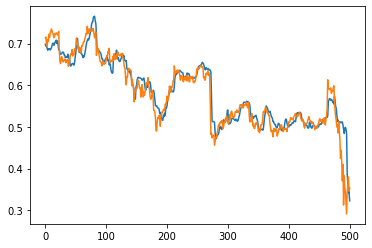

In [17]:
mdl = neighbors.KNeighborsRegressor(n_neighbors = 10, weights = "distance", algorithm = "auto")
mdl.fit(X_train, y_train)
pred = mdl.predict(X_test.reshape((X_test.shape[0], -1), order='F'))
plt.plot(pred)
plt.plot(y_test)
pred

In [18]:
#config
lstm_size = 128
num_layers = 1
leep_prob = .8
batch_size = 64
init_learning_rate = .001
learning_rate_decay = .99
init_epoch = 5
max_epoch = 50

In [19]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()

In [20]:
X_train = X_train.reshape((X_train.shape[0], -1), order='F')
mdl.fit(X_train, y_train)
X_test = X_test.reshape((X_test.shape[0], -1), order='F')
len(y_test)

501

In [25]:
pred = mdl.predict(X_test)

array([[0.70549039],
       [0.71292981],
       [0.71434176],
       [0.69514499],
       [0.69280686],
       [0.70835912],
       [0.70400101],
       [0.72263658],
       [0.71341061],
       [0.72222519],
       [0.72948823],
       [0.73380094],
       [0.72867634],
       [0.725013  ],
       [0.72238226],
       [0.71279516],
       [0.71487667],
       [0.72449612],
       [0.72249176],
       [0.72454546],
       [0.7238056 ],
       [0.71945047],
       [0.71872433],
       [0.72892648],
       [0.68186603],
       [0.6569199 ],
       [0.65162132],
       [0.6616108 ],
       [0.66902311],
       [0.66049178],
       [0.6544973 ],
       [0.65462104],
       [0.65899364],
       [0.66274717],
       [0.65815135],
       [0.65436579],
       [0.65904515],
       [0.66068694],
       [0.66020076],
       [0.64541489],
       [0.65822307],
       [0.65556542],
       [0.67019099],
       [0.67409281],
       [0.67269477],
       [0.68516313],
       [0.67034081],
       [0.673

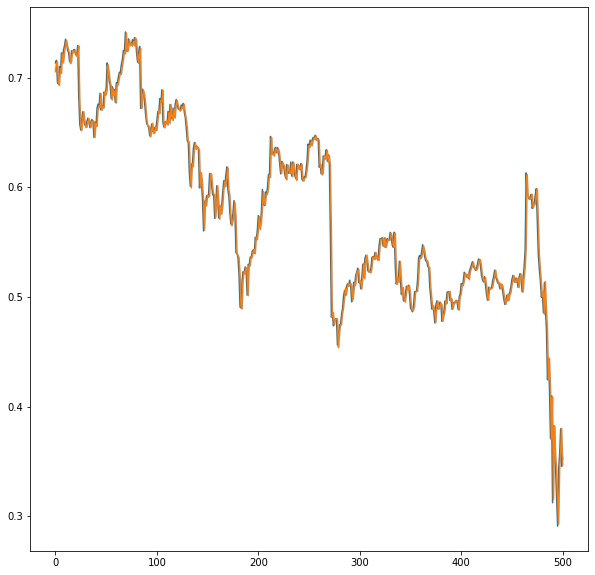

In [26]:
plt.figure(figsize = (10,10))
plt.plot(y_test)
plt.plot(pred)
pred

In [303]:
from sklearn.metrics import mean_squared_error as mse
mse(pred, y_test)

14.606239975329933

In [435]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers

In [468]:
#config
lstm_size = 128
num_layers = 1
leep_prob = .8
batch_size = 32
init_learning_rate = .001
learning_rate_decay = .99
init_epoch = 5
max_epoch = 50

In [469]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(batch_size, num_steps, X_train.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.RMSprop()
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [470]:
history = lstm_model.fit(X_train, y_train, epochs=max_epoch, verbose=2, batch_size=batch_size,shuffle=False)

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 1743 samples

(1743, 30)

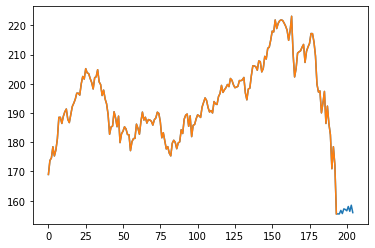

In [316]:

plt.plot(pred2)
plt.plot(pred)

